In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("2) Stock Prices Data Set.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for one stock symbol
df = df[df['symbol'] == df['symbol'].iloc[0]]

# Set date as index
df.set_index('date', inplace=True)

df.head()


symbol   open     high    low   close    volume
date                                                      
2014-01-02    AAL  25.07  25.8200  25.06  25.360   8998943
2014-01-03    AAL  25.75  26.7500  25.51  26.540  13836062
2014-01-06    AAL  26.62  27.2000  26.60  27.030  11272273
2014-01-07    AAL  27.20  27.3997  26.67  26.905  11288775
2014-01-08    AAL  26.37  27.6800  26.35  27.630  15736891

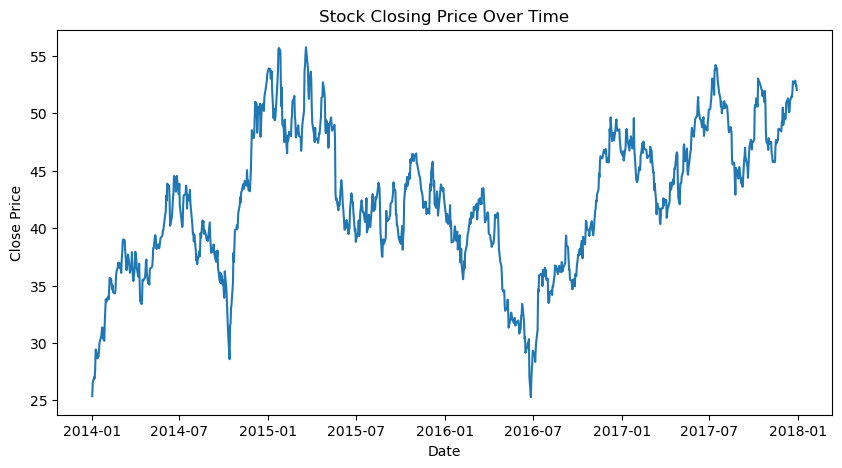

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df['close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Over Time")
plt.show()


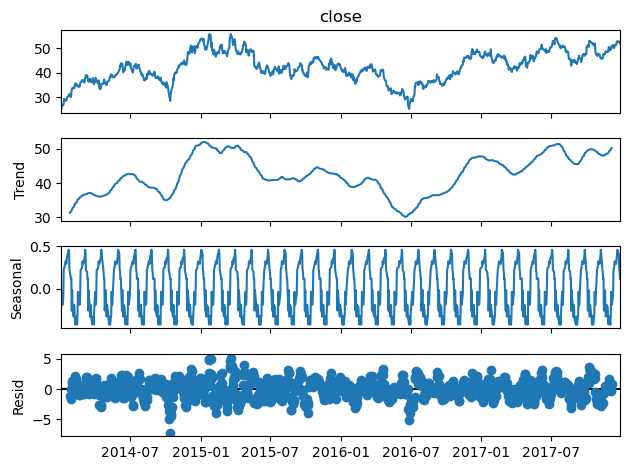

In [4]:
decomposition = seasonal_decompose(df['close'], model='additive', period=30)

decomposition.plot()
plt.show()


In [5]:
df['Moving_Avg_20'] = df['close'].rolling(window=20).mean()

plt.figure(figsize=(10,5))
plt.plot(df['close'], label='Original Close Price')
plt.plot(df['Moving_Avg_20'], label='20-Day Moving Average')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Moving Average Smoothing")
plt.legend()
plt.show()
